# Load data

In [1]:
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.measure import regionprops
from skimage import io
import matplotlib.pyplot as plt
import argparse, os, cv2
import numpy as np

plt.style.use('bmh')
np.random.seed(42)

In [2]:
'''
loading images
'''
nevus_filepath = 'data/0/'
melanoma_filepath = 'data/1/'

nevus_files = [f for f in os.listdir(nevus_filepath) if os.path.isfile(nevus_filepath+f)]
melanoma_files = [f for f in os.listdir(melanoma_filepath) if os.path.isfile(melanoma_filepath+f)]
# sort filenames
nevus_files = sorted(nevus_files)
melanoma_files = sorted(melanoma_files)

N = 100
nevus_imgs = [plt.imread(os.path.join(nevus_filepath, nevus_files[i])) for i in range(N)]
melanoma_imgs = [plt.imread(os.path.join(melanoma_filepath, melanoma_files[i])) for i in range(N)]

# resize
nevus_imgs = [cv2.resize(img,(256,256)) for img in nevus_imgs]
melanoma_imgs = [cv2.resize(img,(256,256)) for img in melanoma_imgs]

nevus_imgs = np.array(nevus_imgs)
melanoma_imgs = np.array(melanoma_imgs)

# SLIC  

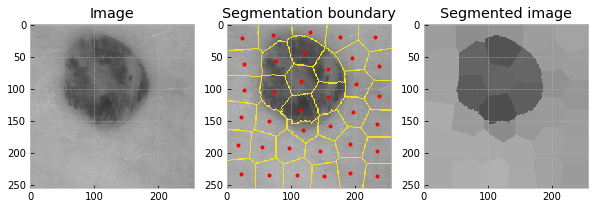

In [3]:
image = nevus_imgs[0] 

# SLIC segmentation
segments = slic(image, 32, compactness=0.3, max_iter=200, multichannel=False, start_label=1)

# Get segmented image
new_image = np.zeros(image.shape)
for i in np.unique(segments):
    cond = segments == i
    new_image[cond] = image[cond].mean()
    
# Compute segmets centroids
regions = regionprops(segments, intensity_image=image)


fig, ax = plt.subplots(1,3, figsize=(10,6))
ax[0].imshow(image, 'gray', vmax=255,vmin=0)
ax[0].set_title('Image')
ax[1].imshow(mark_boundaries(image, segments, color=(240/255,225/255,35/255)), vmax=255,vmin=0)
ax[1].set_title('Segmentation boundary')
ax[2].imshow(new_image, 'gray', vmax=255,vmin=0)
ax[2].set_title('Segmented image')

for props in regions:
    cy, cx = props.centroid
    ax[1].plot(cx, cy, 'r.')
plt.show()

## Segment all images

In [4]:
# Combine some images
all_imgs = np.concatenate((nevus_imgs, melanoma_imgs), axis=0)
all_imgs.shape

(200, 256, 256)

In [5]:
#Compute segmentations  
seg_imgs = []
seg_centers = []

n_segments = 32
compactness = 0.3
max_iter = 200

ii = -1
for img in all_imgs:
    ii+=1
    print(ii,end=' ')
    
    # SLIC segmentation
    segments = slic(img, 32, compactness=0.3, max_iter=200, multichannel=False, start_label=1)
    
    # Compute centers
    regions = regionprops(segments, intensity_image=img)
    seg_centers += [[p.centroid for p in regions]]

    # Get segmented image
    new_image = np.zeros(img.shape)
    for i in np.unique(segments):
        cond = segments == i
        new_image[cond] = img[cond].mean()
    seg_imgs += [new_image]

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 

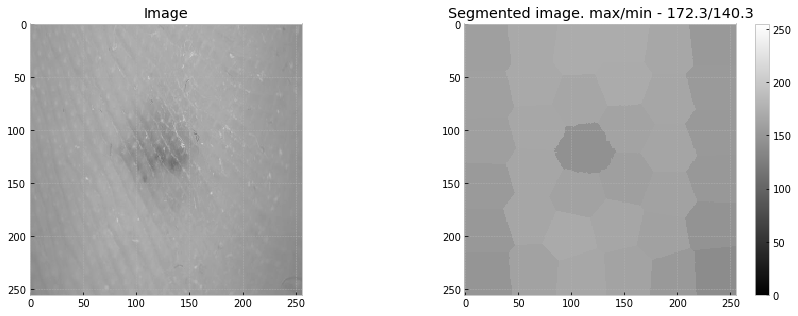

In [14]:
# plt.imshow(,'gray', vmax=255,vmin=0)
index = 130

fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].imshow(all_imgs[index], 'gray', vmax=255,vmin=0)
ax[0].set_title('Image')
im = ax[1].imshow(seg_imgs[index], 'gray', vmax=255,vmin=0)
ax[1].set_title('Segmented image. max/min - {:5.1f}/{:5.1f}'.format(
    seg_imgs[index].max(), seg_imgs[index].min()))
plt.colorbar(im)
plt.show()

## Distribution of segmented data

In [15]:
seg_imgs = np.array(seg_imgs)

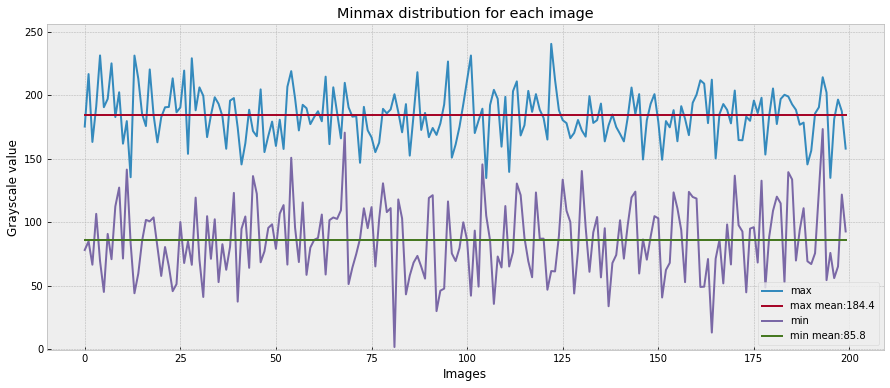

In [18]:

_max = seg_imgs.max(1).max(1)
_min = seg_imgs.min(1).min(1)

m_max = np.zeros(_max.shape) + _max.mean()
m_min = np.zeros(_min.shape) + _min.mean()

plt.figure(figsize=(15,6))
plt.plot(_max, label='max')
plt.plot(m_max, label='max mean:{:3.1f}'.format(_max.mean()))
plt.plot(_min, label='min')
plt.plot(m_min, label='min mean:{:3.1f}'.format(_min.mean()))

plt.ylim(-1,256)
plt.title('Minmax distribution for each image')
plt.legend()
plt.xlabel('Images')
plt.ylabel('Grayscale value')
plt.show()

## Spectral clustering
Data representation: **[ img[x,y], x, y ]**   
where:  
- x, y - coordinats of pixel  
- img[x,y] - color of pixel with coordinats x, y

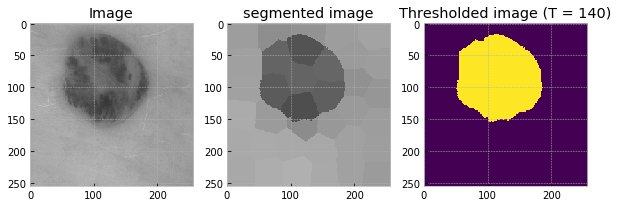

In [19]:
index = 0
img = seg_imgs[index]

fig, ax = plt.subplots(1,3, figsize=(10,3))
ax[0].imshow(all_imgs[index], 'gray', vmax=255,vmin=0)
ax[0].set_title('Image')
ax[1].imshow(img, 'gray', vmax=255,vmin=0)
ax[1].set_title('segmented image')
ax[2].imshow(img < 140)
ax[2].set_title('Thresholded image (T = 140)')
plt.show()

### For all data

In [319]:
data = [] 
for x in range(img.shape[0]):
    for y in range(img.shape[1]):
        data += [[img[x,y], x, y]]
data = np.array(data)
data.shape

(65536, 3)

### For center of regions 

In [20]:
data = [] 

for x,y in seg_centers[index]:
    x = int(x)
    y = int(y)
    data += [[img[x,y], x, y]]
    
data = np.array(data)
data.shape

(36, 3)

### Clustering 

In [162]:
# from sklearn.cluster import KMeans

# clustering_model = KMeans(n_clusters=2,random_state=42, n_init=50, max_iter=500, n_jobs=-1).fit(data[:, 1:])

# labels = clustering_model.labels_
# labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [166]:
# data[:,1:].shape

(36, 2)

In [159]:
# # Get segmented image
# new_image = np.zeros(img.shape)
    
# if labels.size > len(seg_centers):
#     i = 0
#     for x in range(img.shape[0]):
#         for y in range(img.shape[1]):
#             new_image[x,y] = labels[i]
#             i += 1
#     plt.imshow(new_image)
# else:
#     for i in range(len(np.unique(img))):
#         cond = img == np.unique(img)[i]
#         new_image[cond] = labels[i]
#     plt.imshow(new_image)

IndexError: index 35 is out of bounds for axis 0 with size 35

In [21]:
import plotly.graph_objects as go

n = go.Scatter3d(x=data[:,0], y=data[:,1], z=data[:,2], 
                 mode='markers',
                 name='nevus',
                 marker=dict(
                     color='rgb(255,169,34)',
                     size=8,
                     opacity=0.8))

# m = go.Scatter3d(x=data[700:,0], y=data[1000:,1], z=data[1000:,2], 
#                  mode='markers',
#                  name='melanomas',
#                  marker=dict(
#                      color='rgb(83,97,255)',
#                      size=3,
#                      opacity=0.8))

fig = go.Figure(data=[n])
fig.update_layout(
    title_text='3D projection',
    height=800,
    width=800
)
fig.show()

In [31]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# X_tsne = TSNE(n_components=2).fit_transform(data[:,:-1])
X_pca = PCA(n_components=2).fit_transform(data[:,:-1])

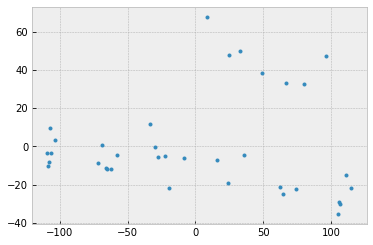

In [32]:
# plt.plot(X_tsne[:,0], X_tsne[:,1], '.')
plt.plot(X_pca[:,0], X_pca[:,1], '.')

[0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


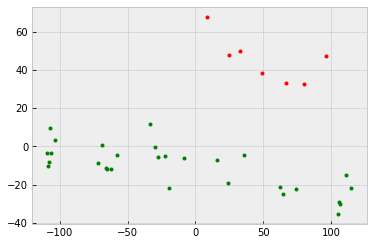

In [40]:
from sklearn.cluster import KMeans, SpectralClustering, DBSCAN

clustering_model = DBSCAN(eps=40, min_samples=2).fit(X_pca)

labels = clustering_model.labels_
print(labels)

if np.unique(labels).size > 1:
#     plt.figure(figsize=(12,6))
    for i in range(0, len(X_pca)):
        if labels[i] == 0:
            plt.plot(X_pca[i,0], X_pca[i,1], '.g')
        elif labels[i] == 1:
            plt.plot(X_pca[i,0], X_pca[i,1], '.r')
        else:
            plt.plot(X_pca[i,0], X_pca[i,1], '.k')

    plt.show()

In [303]:
print(np.sum(X_pca[:,1] > 20), np.sum(X_pca[:,1] < 20))


13846 51690


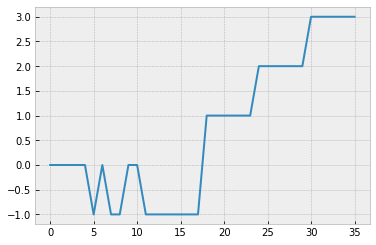

In [36]:
from sklearn.cluster import  OPTICS

clustering_model = OPTICS(min_samples=6, xi=.05, min_cluster_size=.05, n_jobs=-1).fit(X_pca)

labels = clustering_model.labels_
plt.plot(labels)


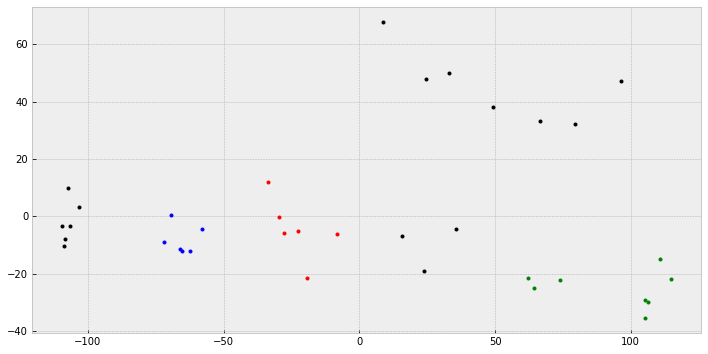

In [37]:
if np.unique(labels).size > 1:
    plt.figure(figsize=(12,6))
    for i in range(0, len(X_pca)):
        if labels[i] == 0:
            plt.plot(X_pca[i,0], X_pca[i,1], '.g')
        elif labels[i] == 1:
            plt.plot(X_pca[i,0], X_pca[i,1], '.r')
        elif labels[i] == 2:
            plt.plot(X_pca[i,0], X_pca[i,1], '.b')
        else:
            plt.plot(X_pca[i,0], X_pca[i,1], '.k')

    plt.show()
else:
    print(':(')